# Text Representation

In [1]:
import pandas as pd

In [2]:
# Fetch preprocessed data
model_data = pd.read_csv("data/keywords.csv")
model_data.head()

Id                                   Name  \
0  1030195                           morning star   
1  1090099    kitty's class day and other stories   
2  1013522              the art of french kissing   
3  1003725  comet in moominland (the moomins, #2)   
4  1099901                the boy who cried horse   

                                            keywords  
0   h._rider_haggard 1st_world_library_-_literary...  
1   louisa_may_alcott 1st_world_library_-_literar...  
2   kristin_harmel 5_spot_pub eng emma paris fren...  
3  the_moomins,_#2 tove_jansson a_&_c_black eng m...  
4   terry_deary a_&_c_black en-GB acheron greeks ...

---
### Vectorize the keywords summary using TF-IDF
- Convert the keywords for each book into a numeric vector, based on the frequency of each word in the book's keywords
- Keep token pattern such that tokens with underscore are not ignored.
- Remove tokens occuring less than 3 times or occur in more than 60% of the documents (common tokens).
- Remove english language stop words

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word',
                        min_df=3,
                        max_df = 0.6,
                        stop_words="english",
                        encoding = 'utf-8', 
                        token_pattern=r"(?u)\S\S+")
tfidf_encoding = tfidf.fit_transform(model_data["keywords"])

In [5]:
# Preview first 100 words in the vocabulary
print(tfidf.get_feature_names_out()[1:100])

['1830s' '1863' '1880s' '1914' '1915' '1920s' '1930s' '1937' '1939' '1940'
 '1941' '1942' '1944' '1945' '1949' '1950s' '1960s' '1963' '1965' '1996'
 '1997' '1999' '2005' '60s' 'abacus' 'abbot' 'abby' 'abbys' 'abducted'
 'abigail' 'academic' 'academy' 'accused' 'ace' 'ace_books' 'activist'
 'activities' 'actor' 'actors' 'actress' 'adam' 'addiction'
 'addison-wesley_professional' 'addison_wesley_publishing_company'
 'admiral' 'adobe' 'adolescence' 'adolescents' 'adolf' 'adopted'
 'adoption' 'adultery' 'adventure' 'adventures' 'affair' 'africa'
 'african' 'africanamerican' 'africanamericans' 'africans' 'afterlife'
 'agatha' 'agatha_christie' 'agent' 'agents' 'ages' 'aircraft' 'airfields'
 'alabama' 'aladdin' 'aladdin_paperbacks' 'alaska' 'alaskan' 'alaskas'
 'alastair_reynolds' 'albert_camus' 'album' 'alec' 'alex' 'alexander'
 'alexandra' 'alfred' 'alfred_a._knopf' 'alfred_a._knopf,_inc.'
 'alfred_a_knopf' 'algeria' 'algonquin_books' 'algorithms' 'alice'
 'alices' 'alien' 'aliens' 'allied

In [34]:
# Lets find representation of a new book's keywords in the existing vocabulary space
tfidf.transform(["looking for alaska by john green"]).toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
tfidf_encoding.toarray().shape

(5644, 3311)

---
### Cosine Similarity between books vector representation

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
book_cosine_sim = cosine_similarity(tfidf_encoding, tfidf_encoding)

In [8]:
# Preview Similarity Matrix
book_cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

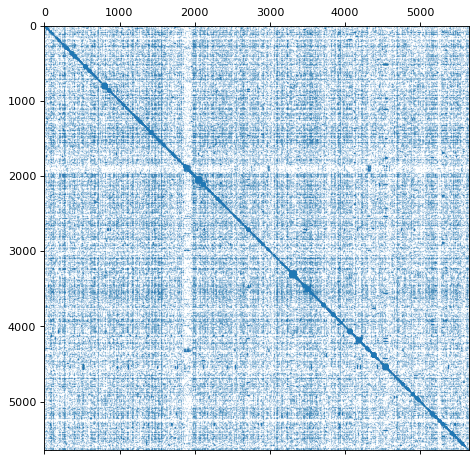

In [32]:
# Vidualize similarity between books
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6), dpi=80)
plt.spy(book_cosine_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()


---
### Recommendation
- Given a book name, find top n similar books based on cosine similarity score.
1) Series Information
2) Other Books In Numbered Series
3) Theme
4) Author

In [56]:
books = pd.Series(model_data['Name'])

def recommend_books_similar_to(book_name, n=5, cosine_sim_mat=book_cosine_sim):
    # get index of the imput book
    input_idx = books[books == book_name].index[0]   
    # Find top n similar books with decreasing order of similarity score
    top_n_books_idx = list(pd.Series(cosine_sim_mat[input_idx]).sort_values(ascending = False).iloc[1:n+1].index)
    # [1:6] to exclude 0 (index 0 is the input movie itself)
    
    books_list = list(books)
    recommended_books = [books[i] for i in top_n_books_idx]
        
    return recommended_books

In [75]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: The Eastland Disaster (Images of America: Illinois)"))
display(recommend_books_similar_to("the eastland disaster (images of america: illinois)", 5))

# Recommendations with series information numbered
print("\n\033[1m{}\033[0m".format("Recommendation (Numbered Series) based on the read: The Majolica Murders (Antique Lover, #5)"))
display(recommend_books_similar_to("the majolica murders (antique lover, #5)", 5))

print("\n\033[1m{}\033[0m".format("Recommendation (Theme: Programming) based on the read: The Practice of Programming (Addison-Wesley Professional Computing Series)"))
display(recommend_books_similar_to('the practice of programming (addison-wesley professional computing series)', 5))

print("\n\033[1m{}\033[0m".format("Recommendation (Author: Dean Koontz) based on the read: Cold Fire"))
display(recommend_books_similar_to("cold fire",5))

Recommendation (Series Information) based on the read: The Eastland Disaster (Images of America: Illinois)


['forgotten chicago (images of america: illinois)',
 'trenton (images of america: new jersey)',
 "altgeld's america",
 'cell',
 'greenlawn: a long island hamlet (images of america: new york)']


Recommendation (Numbered Series) based on the read: The Majolica Murders (Antique Lover, #5)


['four on the floor (antique lover, #4)',
 'the weedless widow (antique lover, #2)',
 'the marriage casket (antique lover, #3)',
 'the body in the bookcase (faith fairchild, #9)',
 'out of control (mcclouds & friends #3)']


Recommendation (Theme: Programming) based on the read: The Practice of Programming (Addison-Wesley Professional Computing Series)


['data structures & other objects using java',
 'software craftsmanship: the new imperative',
 'simply scheme: a methods handbook',
 'the reasoned schemer',
 'nlp solutions: how to model what works in business and make it work for you']


Recommendation (Author: Dean Koontz) based on the read: Cold Fire


['false memory',
 'the door to december',
 'darkfall',
 'forever odd (odd thomas, #2)',
 'whispers']